In [5]:
import re
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

test_set_size = 0.3
x, y = [], []
with open("./data.txt","r")as file:
    lines = file.read().split("\n")
    for line in lines:
        triple = re.split(" +",line.strip())
        x.append(triple[0:2])
        y.append(triple[2])
x = np.asarray(x, dtype=np.float32)
y = np.asarray(y, dtype=np.int)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=test_set_size)

In [11]:
class MyLogisticRegression:
    def __init__(self):
        self.batch_size = 10
        self.epoch = 100
        self.learning_rate = 0.1

    def fit(self,x,y):
        self.data_x = np.asarray(x,np.float32)
        self.data_y = np.asarray(y,np.int)
        self.data_set_size = self.data_x.shape[0]

        self.weights = np.zeros(self.data_x.shape[1],dtype=np.float32)
        self.bias = np.array([0],dtype=np.float32)

        for round in range(self.epoch):
            self.data_pointer = 0
            batch_x,batch_y = self.get_next_batch()
            while batch_x is not None:
                #计算batch上的预测概率  1.点乘 2.在第1维度进行累加 3.加上偏置 4.sigmoid
                pre = self.sigmoid(np.sum(batch_x * self.weights,axis=1) + self.bias)
                #计算损失函数
                loss = np.mean(-(batch_y * np.log(pre) + (1 - batch_y) * np.log(1 - pre)))
                #计算梯度
                gradient_w = - np.mean(((batch_y - pre) * batch_x.T ).T,axis=0)
                gradient_b = - np.mean(batch_y - pre)
                #更新参数
                self.weights -= self.learning_rate * gradient_w
                self.bias -= self.learning_rate * gradient_b

                batch_x, batch_y = self.get_next_batch()

    def score(self,x,y):
        self.data_x = x
        self.data_y = y
        self.data_set_size = self.data_x.shape[0]
        
        self.pre_y = self.sigmoid(np.sum(self.data_x * self.weights, axis=1) + self.bias) 
        loss = np.mean(- (self.data_y * np.log(self.pre_y) + (1 - self.data_y) * np.log(1 - self.pre_y)))
        self.get_metirc()
    
    def predict(self,x):
        self.data_x = x
        pre_y = self.sigmoid(np.sum(self.data_x * self.weights, axis=1) + self.bias)
        return pre_y
    
    def get_next_batch(self):
        if self.data_pointer < self.data_set_size:
            next_pointer = self.data_pointer + self.batch_size
            if next_pointer < self.data_set_size:
                batch_x = self.data_x[self.data_pointer:next_pointer, :]
                batch_y = self.data_y[self.data_pointer:next_pointer]
            else:
                batch_x = self.data_x[self.data_pointer:, :]
                batch_y = self.data_y[self.data_pointer:]
            self.data_pointer = next_pointer
        else:
            batch_x = None
            batch_y = None
        return batch_x, batch_y

    def get_metirc(self):
        tp, tn, fp, fn = 0, 0, 0, 0
        for pre, label in zip(self.pre_y, self.data_y):
            if pre >= 0.5:
                if label == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if label == 1:
                    fn += 1
                else:
                    tn += 1
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = 2 * precision * recall/(precision + recall)
        accuracy = (tp + tn) / (tp + tn + fn + fp)
        print("precision:" + str(precision))
        print("recall:" + str(recall))
        print("f1:" + str(f1))
        print("accracy:" + str(accuracy))

    def sigmoid(self,x):
        x = np.asarray(x,dtype=np.float32)
        return 1/(1 + np.exp(x * -1))


In [12]:

print("=================================== Running My Logistic Regression ===================================")
my_logistic_regression = MyLogisticRegression()
my_logistic_regression.fit(train_x,train_y)
my_logistic_regression.score(test_x,test_y)


=================================== Running My Logistic Regression ===================================
precision:0.8461538461538461
recall:0.9166666666666666
f1:0.8799999999999999
accracy:0.9


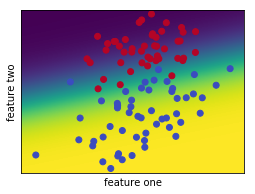

In [13]:
LR = my_logistic_regression
h = .02
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z)

plt.scatter(x[:, 0], x[:, 1], c=y,cmap=plt.get_cmap('coolwarm_r'))
plt.xlabel('feature one')
plt.ylabel('feature two')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [14]:

print("=================================== Running sk-learn Logistic Regression ===================================")
from sklearn.linear_model.logistic import LogisticRegression
from sklearn import metrics
official_logistic_regression = LogisticRegression()
official_logistic_regression.fit(train_x,train_y)
pre_y = official_logistic_regression.predict(test_x)

precision = metrics.precision_score(test_y,pre_y)
recall = metrics.recall_score(test_y,pre_y)
f1 = metrics.f1_score(test_y,pre_y)
accuracy = metrics.accuracy_score(test_y,pre_y)

print("precision:" + str(precision))
print("recall:" + str(recall))
print("f1:" + str(f1))
print("accracy:" + str(accuracy))

=================================== Running sk-learn Logistic Regression ===================================
precision:1.0
recall:0.9166666666666666
f1:0.9565217391304348
accracy:0.9666666666666667


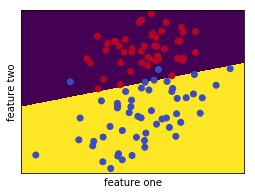

In [15]:
LR = official_logistic_regression
h = .02
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z)

plt.scatter(x[:, 0], x[:, 1], c=y,cmap=plt.get_cmap('coolwarm_r'))
plt.xlabel('feature one')
plt.ylabel('feature two')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()